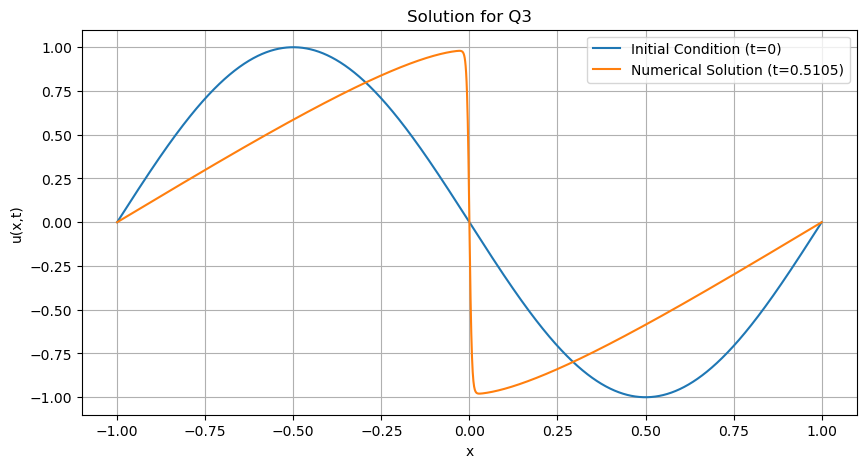


--- Q3 Results ---
Estimated ∂u/∂x at x=0(idx = 1500) t=0.5104735644729451 (0.1625/π): -141.825304
Target value: -152.00516
Difference: 1.017986e+01
Relative error: 0.066970


In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Define the initial condition function for Q3
def eta(x):
    return -np.sin(np.pi * x)

# --- Assuming 'step' function is defined as in your previous snippet ---
# def step(u, dt, h, eps):
#     u_new = np.copy(u)
#     for i in range(1, len(u)-1):
#         # Advection term - upwind scheme
#         if u[i] >= 0:
#             flux_adv = u[i] * (u[i] - u[i-1])
#         else:
#             flux_adv = u[i] * (u[i+1] - u[i])

#         # Diffusion term - central difference
#         flux_diff = (u[i+1] - 2*u[i] + u[i-1])

#         # Update solution using forward Euler
#         u_new[i] = u[i] - dt/h * flux_adv + eps*dt/h**2 * flux_diff
#     return u_new
# ----------------------------------------------------------------------

def step(u, dt, h, eps):
    u_new = u.copy() # Start with a copy of the current solution

    # Indices for interior points
    i = np.arange(1, len(u) - 1)

    # --- Advection Term (Upwind Scheme) ---
    advection_term_val = np.zeros_like(u[1:-1])

    # Case 1: u[i] >= 0 (flow from left)
    mask_pos = (u[1:-1] >= 0)
    advection_term_val[mask_pos] = u[1:-1][mask_pos] * (u[1:-1][mask_pos] - u[:-2][mask_pos])

    # Case 2: u[i] < 0 (flow from right)
    mask_neg = (u[1:-1] < 0)
    advection_term_val[mask_neg] = u[1:-1][mask_neg] * (u[2:][mask_neg] - u[1:-1][mask_neg])


    # --- Diffusion Term (Central Difference) ---
    diffusion_term_val = (u[2:] - 2*u[1:-1] + u[:-2])

    # --- Update Interior Points ---
    u_new[1:-1] = u[1:-1] - (dt / h) * advection_term_val + (eps * dt / h**2) * diffusion_term_val

    return u_new


# Domain
a = -1
b = 1

# Parameters for Q3
eps = 0.01 / np.pi
Cr_adv = 0.8  # safety factor for advection
Cr_diff = 0.5  # safety factor for diffusion

# Spatial mesh
N = 2999 # You might need to adjust N for better accuracy to match the target
h = (b - a) / (N + 1)
xi = np.arange(a, b + h, h) # np.linspace(a, b, N + 2) is also fine and often preferred

# Temporal mesh
t_in = 0
t_final = 1.6037 / np.pi

# Initial condition for Q3
u = eta(xi)

# Time steps (initial calculation)
# Handle potential division by zero if u is all zeros initially (unlikely with -sin(pi*x))
max_u_initial = np.max(np.abs(u))
if max_u_initial < 1e-10: # Add a small epsilon to prevent division by zero
    dt_adv = Cr_adv * h / 1e-10
else:
    dt_adv = Cr_adv * h / max_u_initial

dt_diff = Cr_diff * h**2 / (2 * eps)
dt = min(dt_adv, dt_diff)

# Save solution at each time step
u_sol = []
u_sol.append(u.copy()) # Append a copy of the initial condition

# Save times array as well
times = []

# Time iteration
ti = 0.0
while ti < t_final:
    # Recalculate time step at each iteration for stability
    max_u_current = np.max(np.abs(u))
    if max_u_current < 1e-10:
        dt_adv = Cr_adv * h / 1e-10
    else:
        dt_adv = Cr_adv * h / max_u_current

    dt_diff = Cr_diff * h**2 / (2 * eps)
    dt = min(dt_adv, dt_diff)

    # Make sure we don't overshoot the final time
    if ti + dt > t_final:
        dt = t_final - ti

    # Apply homogeneous boundary conditions for Q3
    u[0] = 0.0
    u[-1] = 0.0

    # Update solution
    u_new = step(u, dt, h, eps)
    u = u_new.copy()

    # Update time
    ti += dt

    # Save solution (only need the final one for derivative, but keeping for plotting initial/final)
    u_sol.append(u.copy())
    times.append(ti)


# --- Plotting (for sanity check) ---
plt.figure(figsize=(10, 5))
plt.plot(xi, u_sol[0], label='Initial Condition (t=0)')
plt.plot(xi, u_sol[-1], label=f'Numerical Solution (t={t_final:.4f})')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title('Solution for Q3')
plt.legend()
plt.grid(True)
plt.show()

# --- Calculate the spatial derivative at x=0 at t=t_final ---
idx_x0 = np.argmin(np.abs(xi - 0.0))

# Get the final numerical solution
final_u_solution = u_sol[-1] # This is the array u at t_final

# Calculate the spatial derivative using central difference at x=0

numerical_derivative_at_x0 = (final_u_solution[idx_x0 + 1] - final_u_solution[idx_x0 - 1]) / (2 * h)




print(f"\n--- Q3 Results ---")
print(f"Estimated ∂u/∂x at x=0(idx = {idx_x0}) t={t_final} ({t_final/np.pi:.4f}/π): {numerical_derivative_at_x0:.6f}")
true_value = -152.00516 # Define the true/target value for clarity
print(f"Target value: {true_value}")
print(f"Difference: {numerical_derivative_at_x0 - true_value:.6e}")
relative_error = abs((numerical_derivative_at_x0 - true_value) / true_value)
print(f"Relative error: {relative_error:.6f}")


<>:131: SyntaxWarning: invalid escape sequence '\p'
<>:131: SyntaxWarning: invalid escape sequence '\p'
<>:131: SyntaxWarning: invalid escape sequence '\p'
<>:131: SyntaxWarning: invalid escape sequence '\p'
C:\Users\niroj\AppData\Local\Temp\ipykernel_17148\4181220144.py:131: SyntaxWarning: invalid escape sequence '\p'
  plt.title(f'Convergence Test for $\partial u/\partial x$ at $x=0, t={t_final_q3/np.pi:.4f}/\pi$ (Q3)', fontsize=14)
C:\Users\niroj\AppData\Local\Temp\ipykernel_17148\4181220144.py:131: SyntaxWarning: invalid escape sequence '\p'
  plt.title(f'Convergence Test for $\partial u/\partial x$ at $x=0, t={t_final_q3/np.pi:.4f}/\pi$ (Q3)', fontsize=14)


N        h            Est. du/dx         Abs. Error      Rel. Error     
---------------------------------------------------------------------------
199      0.010000     -68.275330         8.372983e+01    5.508354e-01   
399      0.005000     -97.248438         5.475672e+01    3.602294e-01   
799      0.002500     -119.616000        3.238916e+01    2.130793e-01   
1599     0.001250     -133.991779        1.801338e+01    1.185051e-01   
3199     0.000625     -142.419584        9.585576e+00    6.306086e-02   


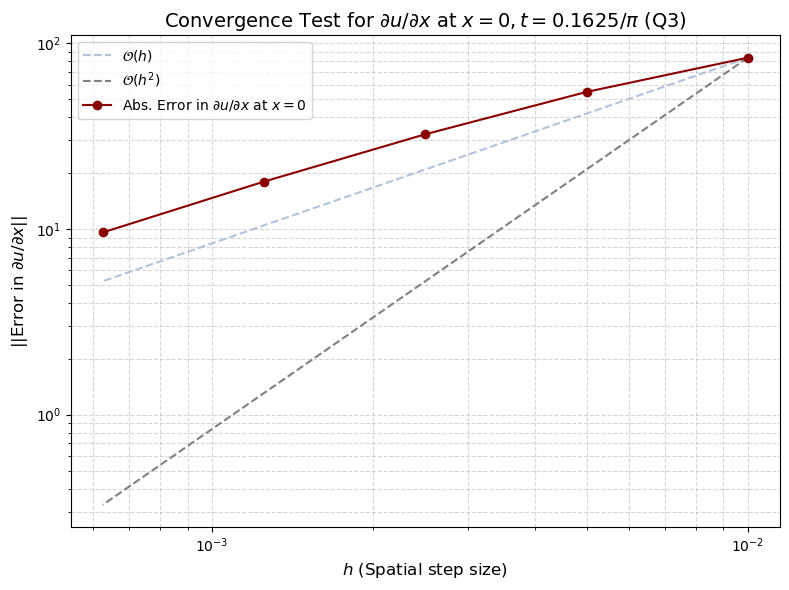


--- Numerical Convergence Rates ---
N=199      h=0.010000     Abs. Error=8.372983e+01   
N=399      h=0.005000     Abs. Error=5.475672e+01    Rate=0.6127
N=799      h=0.002500     Abs. Error=3.238916e+01    Rate=0.7575
N=1599     h=0.001250     Abs. Error=1.801338e+01    Rate=0.8464
N=3199     h=0.000625     Abs. Error=9.585576e+00    Rate=0.9101


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# --- Function Definitions ---

# Define the initial condition function for Q3
def eta(x):
    return -np.sin(np.pi * x)

# Vectorized step function (from previous discussion)
def step_vectorized(u, dt, h, eps):
    u_new = u.copy() # Start with a copy of the current solution

    # Indices for interior points
    i = np.arange(1, len(u) - 1)

    # Advection Term (Upwind for Burger's)
    advection_term_val = np.zeros_like(u[1:-1])

    # Case 1: u[i] >= 0 (flow from left)
    mask_pos = (u[1:-1] >= 0)
    advection_term_val[mask_pos] = u[1:-1][mask_pos] * (u[1:-1][mask_pos] - u[:-2][mask_pos])

    # Case 2: u[i] < 0 (flow from right)
    mask_neg = (u[1:-1] < 0)
    advection_term_val[mask_neg] = u[1:-1][mask_neg] * (u[2:][mask_neg] - u[1:-1][mask_neg])

    # Diffusion Term (Central Difference)
    diffusion_term_val = (u[2:] - 2*u[1:-1] + u[:-2])

    # Update Interior Points using Forward Euler
    u_new[1:-1] = u[1:-1] - (dt / h) * advection_term_val + (eps * dt / h**2) * diffusion_term_val

    return u_new

# --- Convergence Study for Q3 ---

# Target derivative value at x=0, t=1.6037/pi
target_derivative = -152.00516

# Parameters for Q3 (fixed)
eps_q3 = 0.01 / np.pi
t_final_q3 = 1.6037 / np.pi
Cr_adv = 0.8
Cr_diff = 0.5

# Different N values to test
# Choose N values that allow h to be systematically smaller
N_values = [ 199, 399, 799, 1599, 3199] # Increased N for better convergence visualization

hs = []
errors = [] # This will store the absolute difference from the target derivative

print(f"{'N':<8} {'h':<12} {'Est. du/dx':<18} {'Abs. Error':<15} {'Rel. Error':<15}")
print("-" * 75)

for N in N_values:
    # Spatial mesh for current N
    a, b = -1, 1
    h = (b - a) / (N + 1)
    xi = np.linspace(a, b, N + 2) # Use linspace, often more precise for grid points

    # Initial condition for Q3
    u = eta(xi)

    # Time iteration
    ti = 0.0
    u_current = u.copy() # Use u_current to avoid modifying the original u from loop start

    while ti < t_final_q3:
        # Recalculate time step for stability
        max_u_val = np.max(np.abs(u_current))
        # Add small epsilon for robust division to prevent NaN/Inf
        dt_adv = Cr_adv * h / max(max_u_val, 1e-10)
        dt_diff = Cr_diff * h**2 / (2 * eps_q3)
        dt = min(dt_adv, dt_diff)

        # Make sure we don't overshoot the final time
        if ti + dt > t_final_q3:
            dt = t_final_q3 - ti

        # Apply homogeneous boundary conditions for Q3
        u_current[0] = 0.0
        u_current[-1] = 0.0

        # Update solution using the vectorized step function
        u_current = step_vectorized(u_current, dt, h, eps_q3)

        # Update time
        ti += dt

    # --- After simulation for current N, calculate derivative error ---
    # Find the index closest to x = 0
    idx_x0 = np.argmin(np.abs(xi - 0.0))

    # Calculate the spatial derivative using central difference at x=0
    numerical_derivative_at_x0 = np.nan # Initialize as NaN in case of error
    if idx_x0 > 0 and idx_x0 < len(xi) - 1:
        numerical_derivative_at_x0 = (u_current[idx_x0 + 1] - u_current[idx_x0 - 1]) / (2 * h)
    else:
        print(f"Warning: For N={N}, x=0 index {idx_x0} is at boundary. Derivative not calculated.")

    # Calculate errors
    absolute_error = np.abs(numerical_derivative_at_x0 - target_derivative)
    # Use the absolute value of the target derivative for relative error denominator
    relative_error = absolute_error / np.abs(target_derivative) if np.abs(target_derivative) > 1e-10 else np.nan

    hs.append(h)
    errors.append(absolute_error) # Store absolute error for plotting

    print(f"{N:<8} {h:<12.6f} {numerical_derivative_at_x0:<18.6f} {absolute_error:<15.6e} {relative_error:<15.6e}")

# --- Plotting Convergence ---
plt.style.use('default')
plt.figure(figsize=(8, 6))

# Plot reference lines for O(h) and O(h^2)
# We plot against hs, and the y-axis is the error (absolute error in this case)
# We normalize the reference lines to match the first error value for easier comparison
error_h_scaling_factor = errors[0] / hs[0] # Scale O(h) line to pass through first point
error_h2_scaling_factor = errors[0] / (hs[0]**2) # Scale O(h^2) line to pass through first point

plt.loglog(hs, [error_h_scaling_factor * h_val**1 for h_val in hs], linestyle='--', label=r'$\mathcal{O}(h)$', color='lightsteelblue')
plt.loglog(hs, [error_h2_scaling_factor * h_val**2 for h_val in hs], linestyle='--', label=r'$\mathcal{O}(h^2)$', color='grey')
plt.loglog(hs, errors, linestyle='-', marker='o', label=r'Abs. Error in $\partial u/\partial x$ at $x=0$', color='darkred')


# Labels and legend
plt.xlabel(r'$h$ (Spatial step size)', fontsize=12)
plt.ylabel(r'$||\text{Error in } \partial u/\partial x||$', fontsize=12)
plt.title(f'Convergence Test for $\partial u/\partial x$ at $x=0, t={t_final_q3/np.pi:.4f}/\pi$ (Q3)', fontsize=14)
plt.legend()
plt.grid(True, which="both", ls="--", alpha=.5)
plt.tight_layout()
plt.show()

# Optional: Calculate and print numerical convergence rates (like in Q2)
# This uses the computed absolute errors.
rates = []
for i in range(1, len(errors)):
    rate = np.log(errors[i-1] / errors[i]) / np.log(hs[i-1] / hs[i])
    rates.append(rate)

print("\n--- Numerical Convergence Rates ---")
for i, N_val in enumerate(N_values):
    if i == 0:
        print(f"N={N_val:<8} h={hs[i]:<12.6f} Abs. Error={errors[i]:<15.6e}")
    else:
        print(f"N={N_val:<8} h={hs[i]:<12.6f} Abs. Error={errors[i]:<15.6e} Rate={rates[i-1]:.4f}")